# Data Science Glass Door salaries prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.3)


In [2]:
#Load Data 

In [3]:
df = pd.read_csv('glassdoor_jobs.csv')

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [6]:
# data preroccesing

In [7]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df['Job Description'][20]

"About Our Team\n\nWe understand that the first step to a successful home project and a happy homeowner starts with finding the right pro. Our Data Science team is at the center of the matching process, and, as a contributing member of that team, you will build real-time predictive models and evaluate their performance to ensure that homeowners connect with the most qualified contractors.\nAs a data scientist, you will collaborate with a talented team of data scientists on a broad array of technically challenging problems.\nYou will play an integral role in providing optics into how our real-time prediction capabilities drive value into our marketplace, as well as performing market segmentation to deliver the right message to the right consumer as you build up machine learning skills.\nIf you are highly analytical, enjoy a collaborative work environment that encourages mentorship and learning, and have a strong intellectual curiosity to solve customer problems, the Data Science team at

In [10]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [11]:
#Extract job need programming lang. requirement 

In [12]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df.python.value_counts()

1    496
0    460
Name: python, dtype: int64

In [13]:
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R.value_counts()

0    954
1      2
Name: R, dtype: int64

In [14]:

df['Power_BI'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
df.Power_BI.value_counts()

0    903
1     53
Name: Power_BI, dtype: int64

In [15]:
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df.SQL.value_counts()

1    480
0    476
Name: SQL, dtype: int64

In [16]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

1    486
0    470
Name: excel, dtype: int64

In [17]:
df['computer vision'] = df['Job Description'].apply(lambda x: 1 if 'computer vision' in x.lower() else 0)
df['computer vision'].value_counts()

0    917
1     39
Name: computer vision, dtype: int64

In [18]:
df['PhD'] = df['Job Description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)
df['PhD'].value_counts()

0    745
1    211
Name: PhD, dtype: int64

In [19]:
#simplefy job title

In [20]:
df['Job Title'].value_counts().head(10)

Data Scientist                   178
Data Engineer                     68
Senior Data Scientist             42
Data Analyst                      18
Senior Data Engineer              17
Business Intelligence Analyst     13
Senior Data Analyst               12
Lead Data Scientist                8
Data Science Manager               7
Marketing Data Analyst             6
Name: Job Title, dtype: int64

In [21]:
def title_simplify(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ml'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [22]:

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'Manager' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'Associate' in title.lower():
        return 'junior'
    else:
        return 'na'

In [23]:
df['job_simp'] = df['Job Title'].apply(title_simplify)

In [24]:
df.job_simp.value_counts()

data scientist    358
other             238
data engineer     158
analyst           124
manager            36
ml                 26
director           16
Name: job_simp, dtype: int64

In [25]:
df['seniority'] = df['Job Title'].apply(seniority)

In [26]:
df.seniority.value_counts()

na        687
senior    266
junior      3
Name: seniority, dtype: int64

In [27]:
#trim company_txt

In [28]:
df['Company Name'][0].split('\n')[0]

'Tecolote Research'

In [29]:
df['company_txt'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [30]:
df['company_txt'].value_counts().head(10)

MassMutual                                         14
Novartis                                           14
Reynolds American                                  14
Takeda Pharmaceuticals                             14
The Church of Jesus Christ of Latter-day Saints    13
Software Engineering Institute                     13
Liberty Mutual Insurance                           10
PNNL                                               10
AstraZeneca                                         9
MITRE                                               8
Name: company_txt, dtype: int64

In [31]:
#state Job Extract

In [32]:
df['Location'].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

In [33]:
df['Location'].replace('Michigan','Michigan, MI',inplace=True)


In [34]:
df[df['Location']=='Michigan, MI']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python,R,Power_BI,SQL,excel,computer vision,PhD,job_simp,seniority,company_txt
925,Data Scientists,-1,Position Description:\nThe Analytics Research ...,3.3,Miracle Software Systems\n3.3,"Michigan, MI","Novi, MI",51 to 200 employees,1994,Company - Private,...,1,0,0,0,0,0,0,data scientist,na,Miracle Software Systems


In [35]:
df['Location'][0].split(',')[1]

' NM'

In [36]:
df['job_location_state'] = df['Location'].apply(lambda x: x.split(',')[-1])

In [37]:
df['job_location_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', 'Oregon', ' OR', ' CT', ' MI', ' AZ',
       ' DC', ' OH', ' AL', ' MO', ' RI', ' PA', ' GA', 'New Jersey',
       ' IN', ' LA', ' WI', 'Virginia', ' NC', ' MN', ' NE', ' UT', ' TN',
       ' DE', ' ID', ' AK', 'United States', ' IA', ' SC', ' KS', ' PR',
       'Maryland'], dtype=object)

In [38]:
df[df['Location']=='United States']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,R,Power_BI,SQL,excel,computer vision,PhD,job_simp,seniority,company_txt,job_location_state
304,Data Scientist - Consultant - National,-1,Do YOU love working with Data in machine learn...,4.2,Clarity Insights\n4.2,United States,"Chicago, IL",201 to 500 employees,2008,Company - Private,...,0,0,1,1,0,0,data scientist,na,Clarity Insights,United States


In [39]:
df['job_location_state'].replace('Oregon','OR',inplace=True)
df['job_location_state'].replace('New Jersey','NJ',inplace=True)
df['job_location_state'].replace('Virginia','VA',inplace=True)
df['job_location_state'].replace('Virginia','VA',inplace=True)
df['job_location_state'].replace('United States','IL',inplace=True)

In [40]:
#age of company 

In [41]:
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)

In [42]:
#salary Estimate 

In [43]:
df['Salary Estimate']

0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
951    $72K-$133K (Glassdoor est.)
952     $56K-$91K (Glassdoor est.)
953    $95K-$160K (Glassdoor est.)
954                             -1
955    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 956, dtype: object

In [44]:
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

In [45]:
#get pair almount in per hour 

In [46]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [47]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,computer vision,PhD,job_simp,seniority,company_txt,job_location_state,age,hourly,employer_provided
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,data scientist,na,Tecolote Research,NM,47,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,data scientist,na,University of Maryland Medical System,MD,36,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,data scientist,na,KnowBe4,FL,10,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,data scientist,na,PNNL,WA,55,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,data scientist,na,Affinity Solutions,NY,22,0,0


In [48]:
df[df['Sector']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,computer vision,PhD,job_simp,seniority,company_txt,job_location_state,age,hourly,employer_provided
43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,...,1,0,0,data engineer,na,Persivia,MA,-1,0,0
114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,...,1,0,0,data scientist,na,Bridgerock Data,FL,-1,0,0
121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,...,0,0,0,other,na,LEAH Labs,MN,-1,0,0
149,Senior Data Scientist,-1,Our Mission\n\nWe make it fly! Join us and bui...,3.6,My Job Tank\n3.6,"San Francisco, CA","New York, NY",51 to 200 employees,-1,Company - Private,...,0,0,1,data scientist,senior,My Job Tank,CA,-1,0,0
214,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,...,0,0,0,data scientist,na,Seen by Indeed,PA,-1,0,0
238,Data Science Manager,-1,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,...,1,0,0,manager,na,Decode_M,NY,-1,0,0
283,Environmental Scientist,-1,JOB SUMMARY:\nThe Environmental Scientist will...,2.4,Calista\n2.4,"Anchorage, AK","Anchorage, AK",1001 to 5000 employees,-1,Other Organization,...,0,0,0,other,na,Calista,AK,-1,0,0
345,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,...,0,0,0,data scientist,na,Seen by Indeed,PA,-1,0,0
377,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,...,1,0,0,other,senior,Muso,CA,-1,0,1
405,Scientist – Cancer Drug Discovery,-1,Scientist – Cancer Drug Discovery\nLocation: C...,-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,...,1,0,1,other,na,Monte Rosa Therapeutics,MA,-1,0,0


In [49]:
df[df['Sector']=='-1'].index

Int64Index([ 43, 114, 121, 149, 214, 238, 283, 345, 377, 405, 424, 472, 503,
            513, 518, 531, 583, 584, 612, 618, 621, 626, 628, 667, 703, 741,
            762, 772, 778, 798, 819, 833, 842, 844, 847, 850, 865, 903, 943],
           dtype='int64')

In [50]:
df.drop(index=[ 43, 114, 121, 149, 214, 238, 283, 345, 377, 405, 424, 472, 503,
            513, 518, 531, 583, 584, 612, 618, 621, 626, 628, 667, 703, 741,
            762, 772, 778, 798, 819, 833, 842, 844, 847, 850, 865, 903, 943],axis=0,inplace=True)

In [51]:
df[df['Salary Estimate']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,computer vision,PhD,job_simp,seniority,company_txt,job_location_state,age,hourly,employer_provided
24,Data Scientist,-1,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,Oregon,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,0,0,0,data scientist,na,Mars,OR,109,0,0
42,Data Scientist,-1,Take your career to new heights working with a...,4.1,Amount\n4.1,"Chicago, IL","Chicago, IL",201 to 500 employees,2015,Company - Private,...,0,0,0,data scientist,na,Amount,IL,5,0,0
47,Data Science Analyst,-1,Company Overview:\n\nBrightside is an employee...,5.0,Brightside\n5.0,"Chandler, AZ","San Francisco, CA",51 to 200 employees,2017,Company - Private,...,0,0,0,analyst,na,Brightside,AZ,3,0,0
53,Data Engineer,-1,"Data Engineer\n£50,000 – £70,000 See Advert\n\...",4.5,Anson McCade\n4.5,"Kingdom, IL","London, United Kingdom",51 to 200 employees,2000,Company - Private,...,0,0,0,data engineer,na,Anson McCade,IL,20,0,0
64,Business Intelligence Analyst,-1,Business Intelligence Analyst\nAccounting\n50 ...,3.1,Amica Mutual\n3.1,"Lincoln, RI","Lincoln, RI",1001 to 5000 employees,1907,Company - Private,...,1,0,0,analyst,na,Amica Mutual,RI,113,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,Data Engineer 5 - Contract,-1,Purposes\n\nThis is a contract position that w...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,...,1,0,0,data engineer,na,The Church of Jesus Christ of Latter-day Saints,UT,-1,0,0
925,Data Scientists,-1,Position Description:\nThe Analytics Research ...,3.3,Miracle Software Systems\n3.3,"Michigan, MI","Novi, MI",51 to 200 employees,1994,Company - Private,...,0,0,0,data scientist,na,Miracle Software Systems,MI,26,0,0
927,"Head Data Scientist – Image Analytics lead, No...",-1,"06-Feb-2020\n\nJob ID\n279186BR\n{""QuestionNam...",3.8,Novartis\n3.8,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,1,0,0,data scientist,senior,Novartis,MA,24,0,0
937,"Scientist, Product Development",-1,Requisition Number:\nVALA4948\n\nJob Title:\nS...,2.9,Pharmavite\n2.9,"Valencia, CA","West Hills, CA",1001 to 5000 employees,1971,Company - Private,...,1,0,1,other,na,Pharmavite,CA,49,0,0


In [52]:
drop_index = df[df['Salary Estimate']=='-1'].index
df.drop(index=drop_index,axis =0,inplace=True)

In [53]:
df[df['job_location_state']=='-1'].index

Int64Index([], dtype='int64')

In [54]:
df.shape

(732, 28)

In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'python', 'R', 'Power_BI', 'SQL', 'excel', 'computer vision', 'PhD',
       'job_simp', 'seniority', 'company_txt', 'job_location_state', 'age',
       'hourly', 'employer_provided'],
      dtype='object')

In [56]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary_1 = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [57]:
salary_1 

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 732, dtype: object

In [58]:
Salary_range = salary_1.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
Salary_range

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 732, dtype: object

In [59]:
df['min_salary'] = Salary_range.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = Salary_range.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [60]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_simp,seniority,company_txt,job_location_state,age,hourly,employer_provided,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,data scientist,na,Tecolote Research,NM,47,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,data scientist,na,University of Maryland Medical System,MD,36,0,0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,data scientist,na,KnowBe4,FL,10,0,0,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,data scientist,na,PNNL,WA,55,0,0,56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,data scientist,na,Affinity Solutions,NY,22,0,0,86,143,114.5


In [61]:
#hourly to annual 

In [62]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2.080 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2.080 if x.hourly ==1 else x.max_salary, axis =1)

In [63]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,35.36,49.92
209,1,43.68,70.72
240,1,37.44,52.00
247,1,43.68,70.72
257,1,31.20,52.00
307,1,35.36,49.92
337,1,43.68,70.72
427,1,37.44,52.00
437,1,49.92,81.12
456,1,43.68,70.72


In [64]:
#company ownership

In [65]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District'], dtype=object)

In [66]:
dic={'Company - Private':'Private','Other Organization':'Other'
     ,'Company - Public':'Public','Nonprofit Organization':'Nonprofit'
    ,'Subsidiary or Business Segment':'Business Segment',
     'College / University':'University','School / School District':'School'
    ,'-1':'Other'}

In [67]:
df['Type of ownership'].replace({'Company - Private':'Private','Other Organization':'Other'
     ,'Company - Public':'Public','Nonprofit Organization':'Nonprofit'
    ,'Subsidiary or Business Segment':'Business Segment',
     'College / University':'University','School / School District':'School'
    ,'-1':'Other'},inplace=True)

In [68]:
df['Type of ownership'].unique()

array(['Private', 'Other', 'Government', 'Public', 'Hospital',
       'Business Segment', 'Nonprofit', 'Unknown', 'University', 'School'],
      dtype=object)

In [69]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'python', 'R', 'Power_BI', 'SQL', 'excel', 'computer vision', 'PhD',
       'job_simp', 'seniority', 'company_txt', 'job_location_state', 'age',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [70]:
df['Industry'].value_counts().head(10)

Biotech & Pharmaceuticals                  112
Insurance Carriers                          63
Computer Hardware & Software                59
IT Services                                 50
Health Care Services & Hospitals            49
Enterprise Software & Network Solutions     42
Consulting                                  29
Internet                                    29
Advertising & Marketing                     25
Aerospace & Defense                         25
Name: Industry, dtype: int64

In [71]:
df['Sector'].value_counts().head(10)

Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Finance                       42
Manufacturing                 34
Aerospace & Defense           25
Education                     23
Retail                        15
Name: Sector, dtype: int64

In [72]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            195
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            3
Name: Revenue, dtype: int64

In [73]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'python', 'R', 'Power_BI', 'SQL', 'excel', 'computer vision', 'PhD',
       'job_simp', 'seniority', 'company_txt', 'job_location_state', 'age',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [74]:
# Visiulization for Job requirement

In [75]:
df_job_re= df[['python', 'R', 'Power_BI', 'SQL', 
               'excel', 'computer vision', 'PhD','job_simp', 'seniority']]

graph for python: total = 2


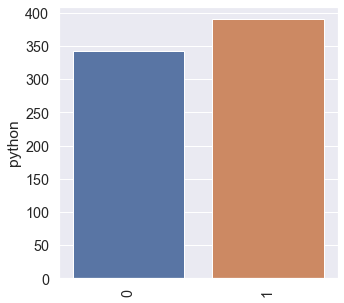

graph for R: total = 2


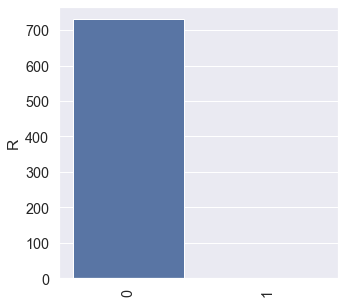

graph for Power_BI: total = 2


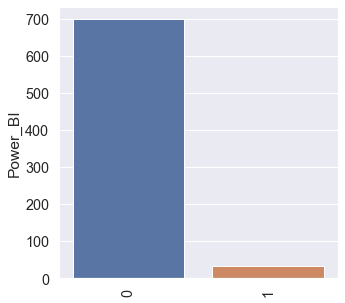

graph for SQL: total = 2


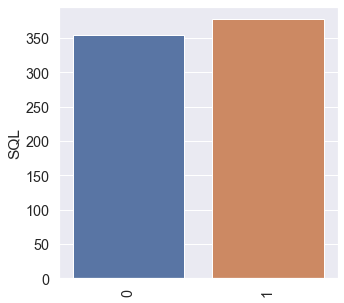

graph for excel: total = 2


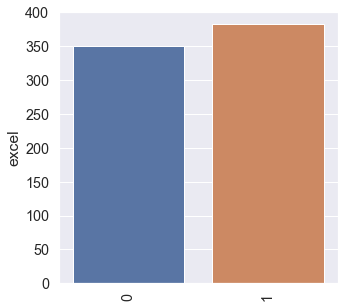

graph for computer vision: total = 2


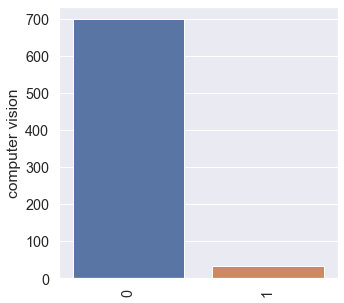

graph for PhD: total = 2


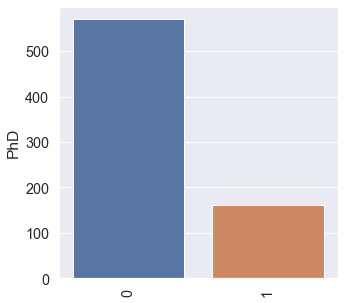

graph for job_simp: total = 7


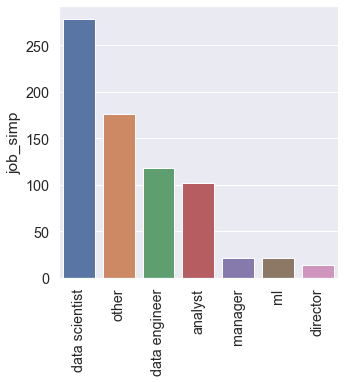

graph for seniority: total = 3


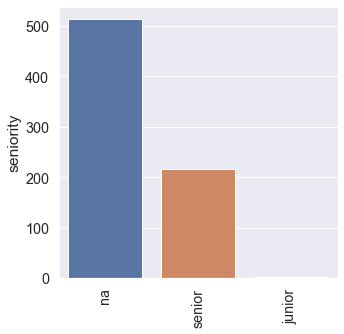

In [76]:
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3)
for i in df_job_re.columns:
    cat_num = df_job_re[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [77]:
df_campany_info=df[['Rating', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue','job_location_state']]

In [78]:
#Plots for campany info

graph for Rating: total = 31


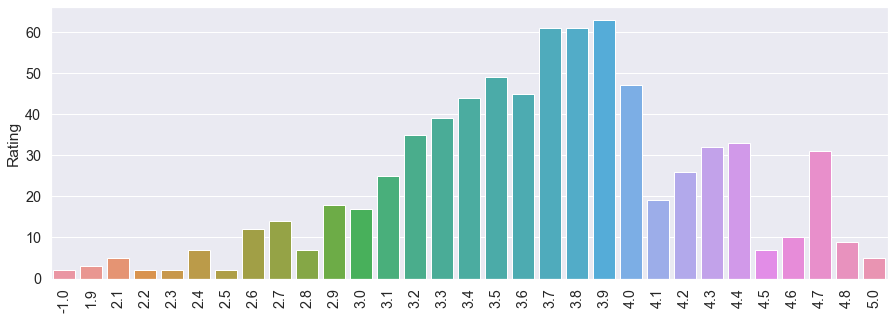

graph for Size: total = 8


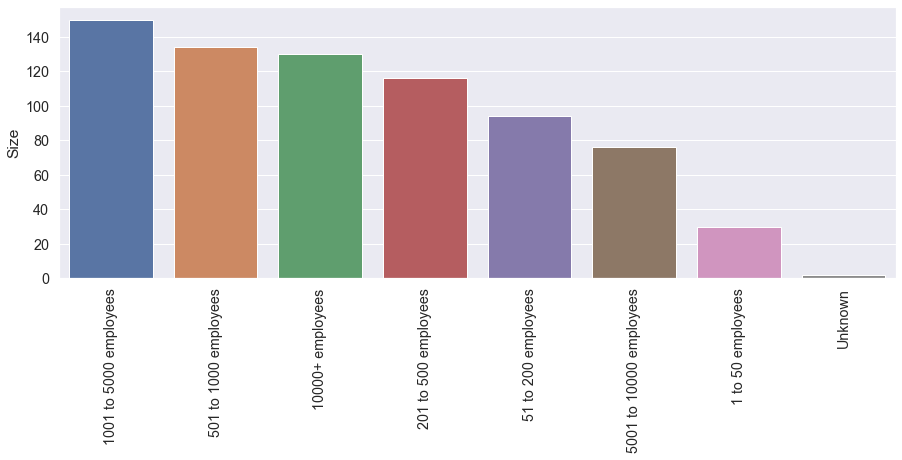

graph for Type of ownership: total = 10


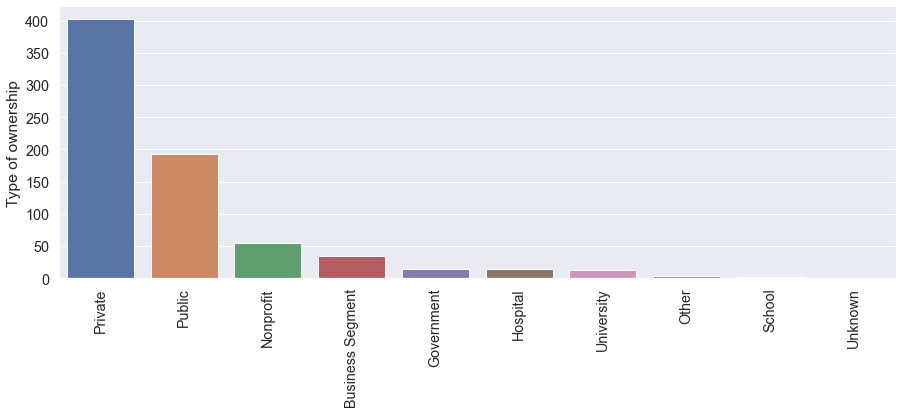

graph for Industry: total = 59


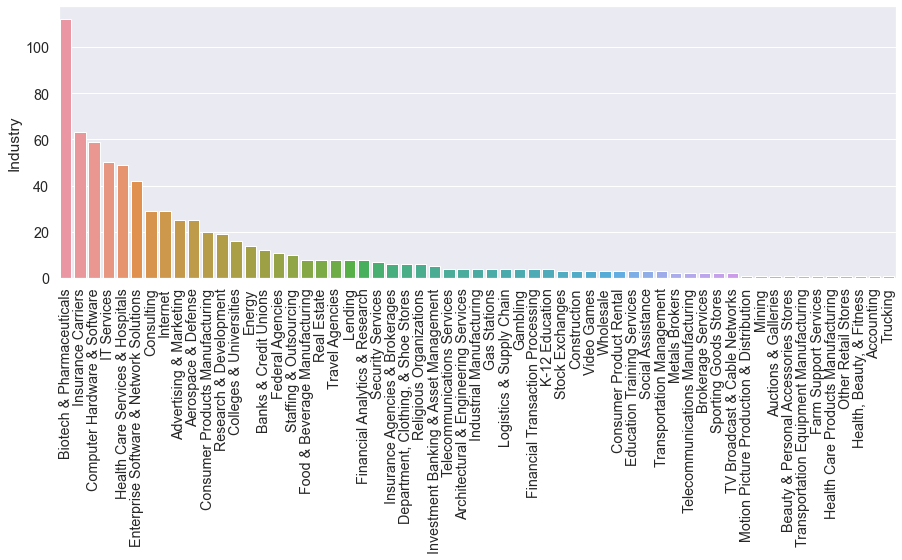

graph for Sector: total = 24


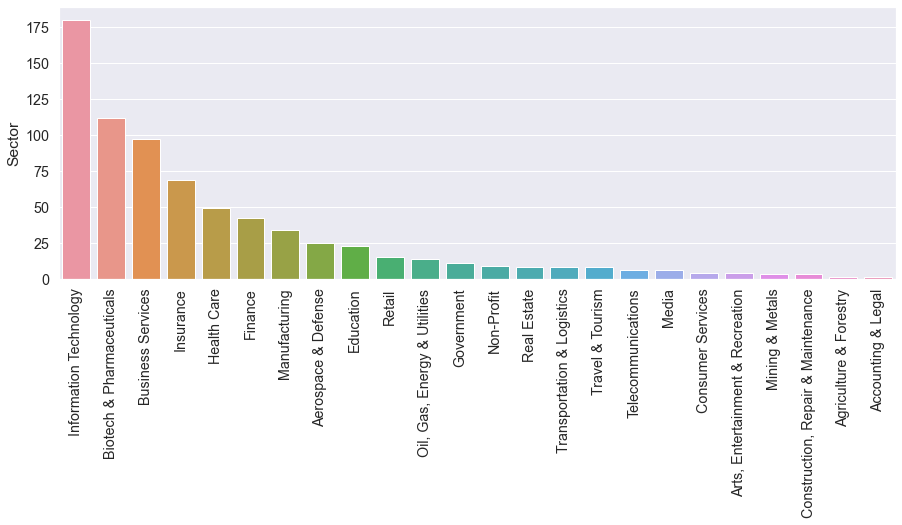

graph for Revenue: total = 13


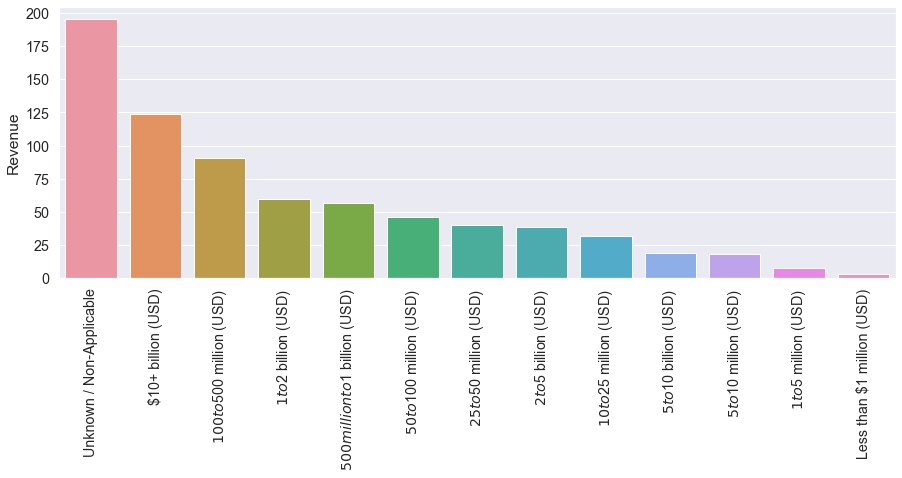

graph for job_location_state: total = 37


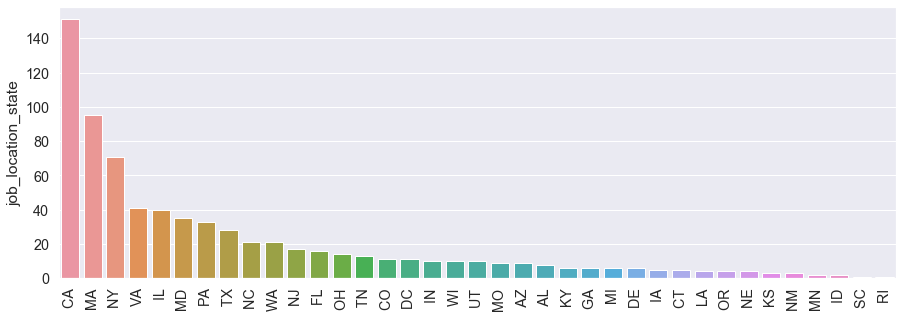

In [79]:
sns.set(rc={'figure.figsize': [15, 5]}, font_scale=1.3)
for i in df_campany_info.columns:
    cat_num = df_campany_info[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [80]:
df.describe()

,Rating,Founded,python,R,Power_BI,SQL,excel,computer vision,PhD,age,hourly,employer_provided,min_salary,max_salary,avg_salary
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,3.675683,1862.266393,0.532787,0.002732,0.046448,0.515027,0.521858,0.045082,0.221311,47.241803,0.032787,0.012295,74.462623,128.176721,100.434426
std,0.620343,451.353522,0.499265,0.052235,0.210597,0.500116,0.499864,0.207626,0.415414,53.854597,0.178200,0.110275,30.976283,45.382892,39.059950
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000
25%,3.300000,1942.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,52.000000,96.000000,73.000000
50%,3.700000,1989.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,0.000000,69.000000,124.000000,96.500000
75%,4.000000,2007.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,59.000000,0.000000,0.000000,91.000000,157.000000,123.500000
max,5.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,276.000000,1.000000,1.000000,202.000000,306.000000,254.000000


In [81]:
#Plots for min | max | avg salary

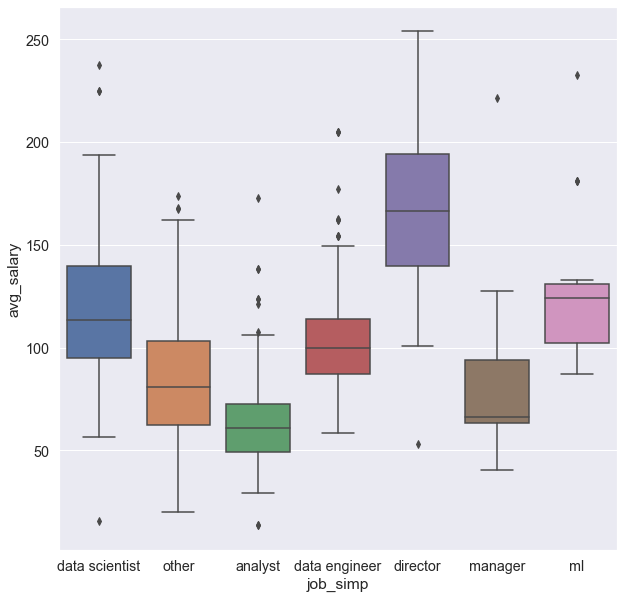

In [82]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(y='avg_salary',x='job_simp',data=df)

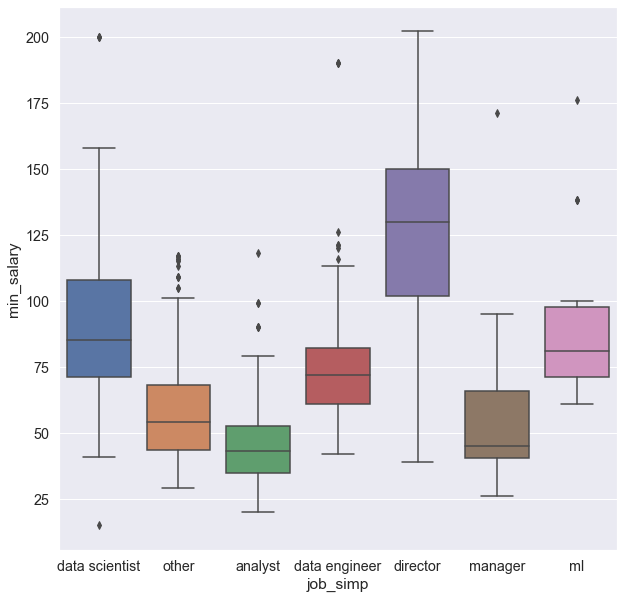

In [83]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(y='min_salary',x='job_simp',data=df)


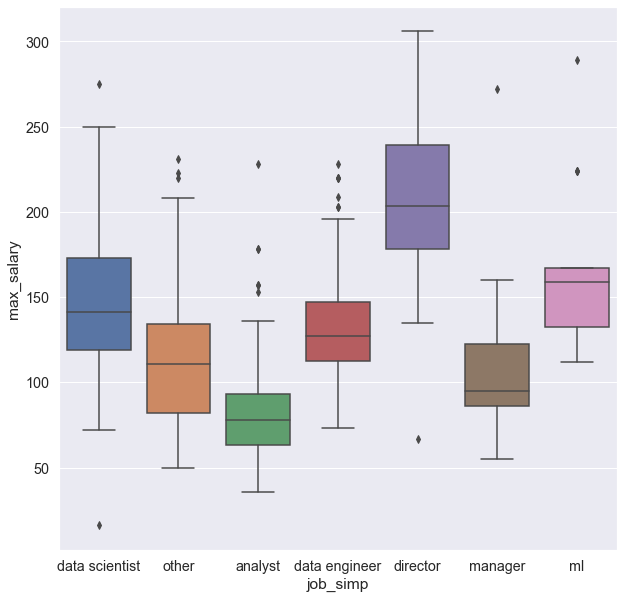

In [84]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(y='max_salary',x='job_simp',data=df)


In [85]:
#Outliers Handling

In [86]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0, df[['min_salary','avg_salary','max_salary']])
len(outliers_indices)

20

In [87]:
df.drop(outliers_indices,inplace=True)

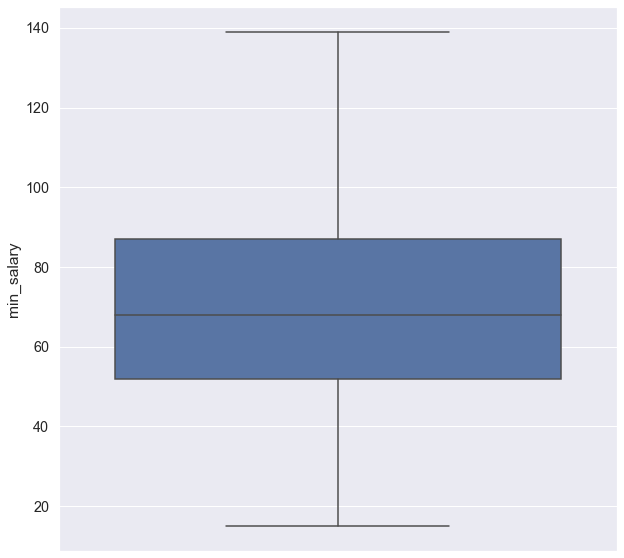

In [88]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.boxplot(y='min_salary',data=df)

In [89]:
# general Visiulization for numeric freatures

In [90]:
#sns.pairplot(df)

In [91]:
# some Visiulization for avg salary VS job title | job location | seniority

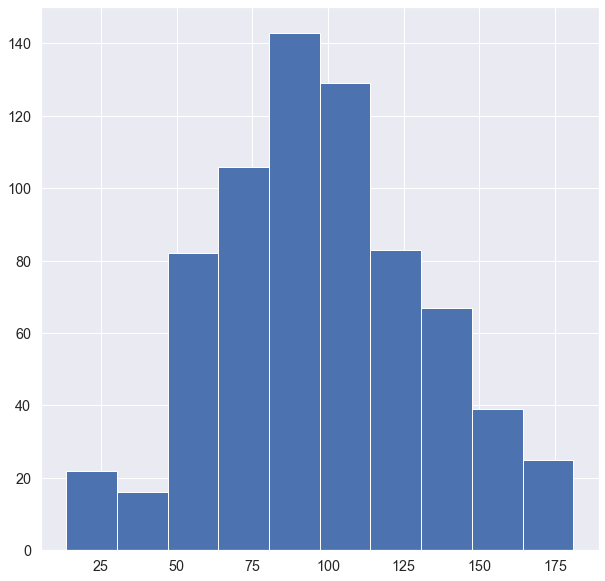

In [92]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3,style='darkgrid')
df['avg_salary'].hist()

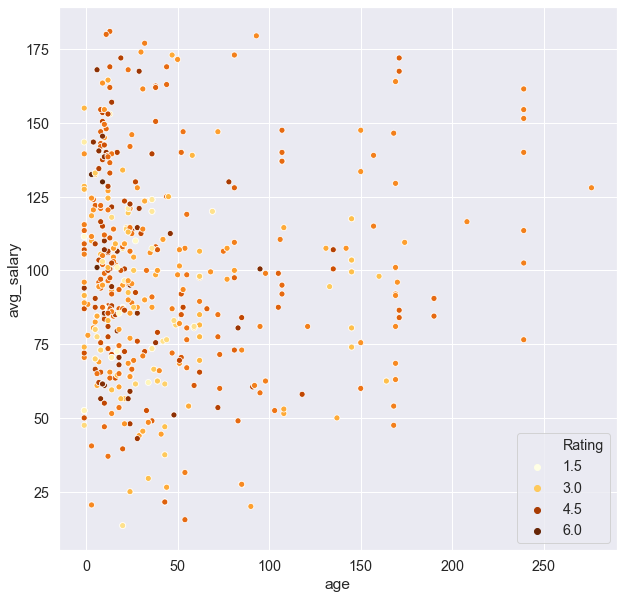

In [93]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3,style='darkgrid')
sns.scatterplot(y='avg_salary',x='age',data=df,hue='Rating',palette="YlOrBr")

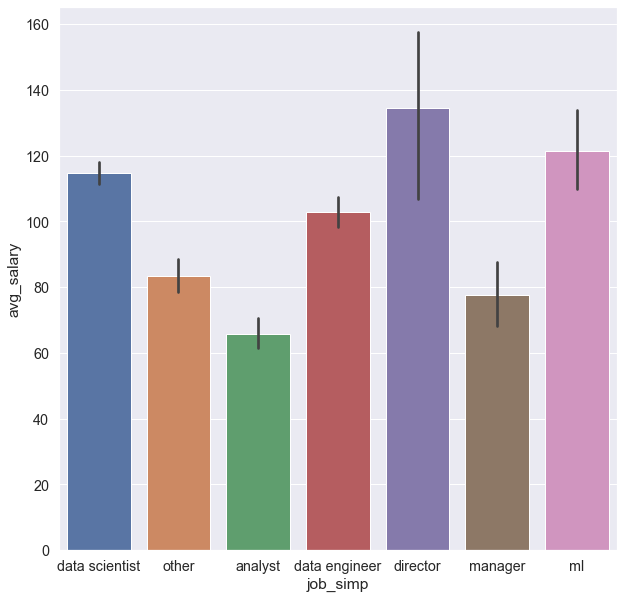

In [94]:
sns.barplot(y='avg_salary',x='job_simp',data=df)

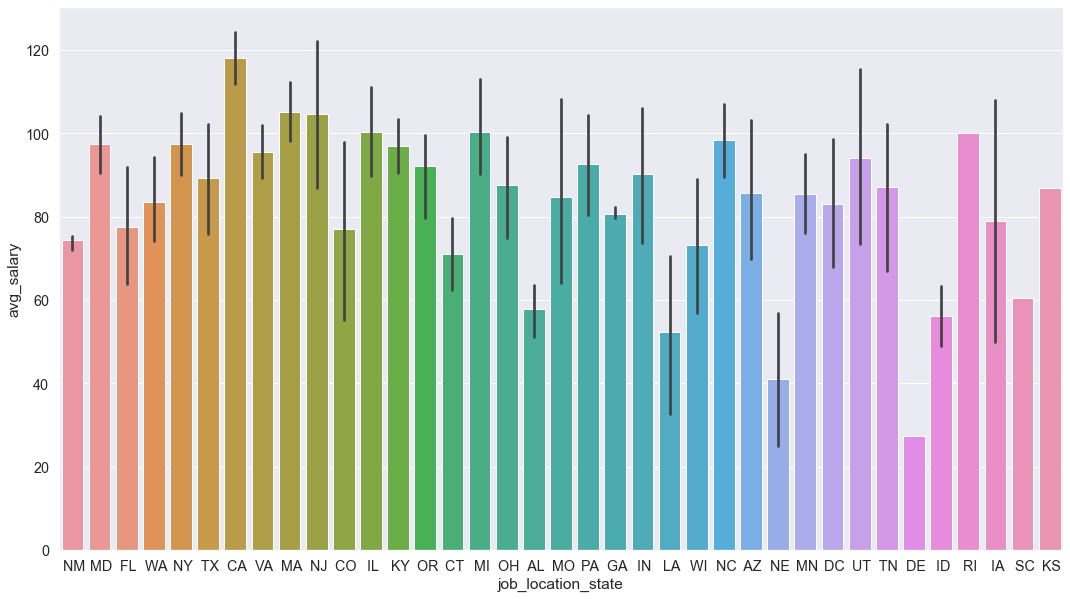

In [95]:
sns.set(rc={'figure.figsize': [18, 10]}, font_scale=1.3)
sns.barplot(y='avg_salary', x='job_location_state',data=df)

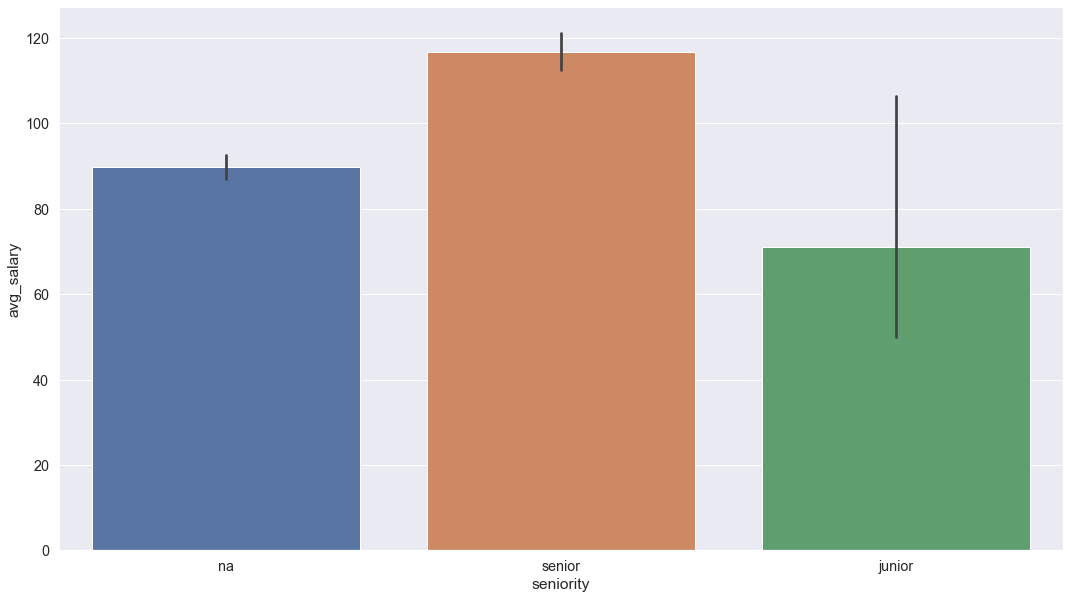

In [96]:
sns.barplot(y='avg_salary', x='seniority',data=df)

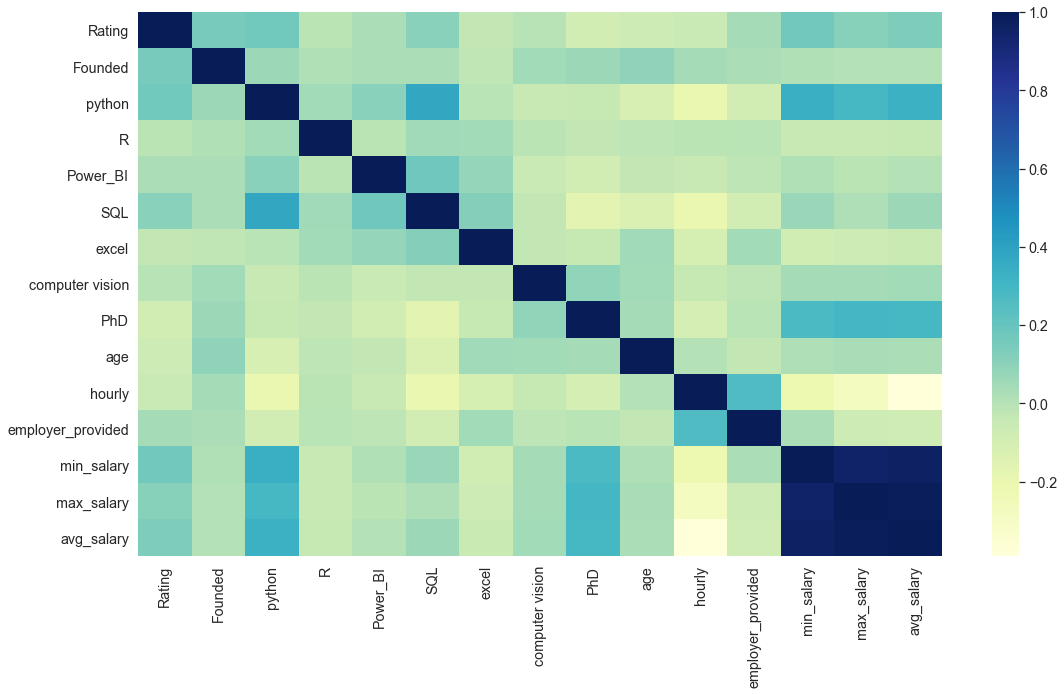

In [97]:
map=df.corr()
sns.heatmap(map,cmap='YlGnBu')

In [98]:
df.describe()

,Rating,Founded,python,R,Power_BI,SQL,excel,computer vision,PhD,age,hourly,employer_provided,min_salary,max_salary,avg_salary
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,3.683989,1864.705056,0.525281,0.002809,0.047753,0.519663,0.522472,0.046348,0.221910,47.379213,0.033708,0.007022,71.653989,125.049663,97.441713
std,0.569597,446.453529,0.499712,0.052963,0.213393,0.499964,0.499846,0.210386,0.415823,54.100594,0.180603,0.083564,26.148701,41.313659,34.858854
min,1.900000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000
25%,3.300000,1944.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,52.000000,95.000000,72.500000
50%,3.700000,1989.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,25.000000,0.000000,0.000000,68.000000,123.000000,95.250000
75%,4.000000,2007.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,59.000000,0.000000,0.000000,87.000000,150.000000,120.625000
max,5.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,276.000000,1.000000,1.000000,139.000000,231.000000,181.000000


In [99]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'python', 'R', 'Power_BI', 'SQL', 'excel', 'computer vision', 'PhD',
       'job_simp', 'seniority', 'company_txt', 'job_location_state', 'age',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [100]:
df.to_csv('cleand.csv',index=False)

In [101]:
# building the ML model 

In [102]:
df_model = df[['job_simp','seniority','python', 'R','job_location_state','Size','Sector',
       'avg_salary']]

In [133]:
df_model['Sector'].value_counts()

Information Technology                167
Biotech & Pharmaceuticals             112
Business Services                      96
Insurance                              64
Health Care                            48
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry                  1
Accounting & Legal                

In [103]:
df_dum= pd.get_dummies(df_model)

In [104]:
#from sklearn.preproccesing import labelEncoder
#le=labelEncoder()
#df_simple['job_simp_cat']=le.fit_transform(df_simple['job_simp'])
#df_simple['seniority_cat']=le.fit_transform(df_simple['seniority'])
#df_simple['job_location_state_cat']=le.fit_transform(df_simple['job_location_state'])
#df_simple['Size_cat']=le.fit_transform(df_simple['Size'])
#df_simple['Sector_cat']=le.fit_transform(df_simple['Sector'])


#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)

In [105]:
#cmap = sns.cubehelix_palette(as_cmap=True, reverse=True, dark=0, light=1)
#sns.heatmap(df_dum.corr(), cmap=cmap)

In [106]:
df_dum.head()

,python,R,avg_salary,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_ml,job_simp_other,...,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
0,1,0,72.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,87.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,85.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,76.5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,114.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_dum.

Index(['python', 'R', 'avg_salary', 'job_simp_analyst',
       'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_ml',
       'job_simp_other', 'seniority_junior', 'seniority_na',
       'seniority_senior', 'job_location_state_ AL', 'job_location_state_ AZ',
       'job_location_state_ CA', 'job_location_state_ CO',
       'job_location_state_ CT', 'job_location_state_ DC',
       'job_location_state_ DE', 'job_location_state_ FL',
       'job_location_state_ GA', 'job_location_state_ IA',
       'job_location_state_ ID', 'job_location_state_ IL',
       'job_location_state_ IN', 'job_location_state_ KS',
       'job_location_state_ KY', 'job_location_state_ LA',
       'job_location_state_ MA', 'job_location_state_ MD',
       'job_location_state_ MI', 'job_location_state_ MN',
       'job_location_state_ MO', 'job_location_state_ NC',
       'job_location_state_ NE', 'job_location_state_ NJ',
       'job_location_state_ NM',

In [124]:
df_dum.shape

(712, 81)

In [108]:
from sklearn.model_selection import train_test_split
x = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
models = [DecisionTreeRegressor(), RandomForestRegressor(),SVR()]

In [112]:
for model in models:
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

0.5874137048891588
0.7097436201567608
0.3000678548935225


In [113]:
rf=RandomForestRegressor(1000)

In [139]:
x_train.shape


(569, 80)

In [114]:
cross_val_score(rf,x_train,y_train, scoring='neg_mean_absolute_error',cv=3)

array([-16.26010564, -16.66789464, -14.69573109])

In [115]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [116]:
y_pred=rf.predict()

In [117]:
rf.score(x_test,y_test)

0.7124152738295145

In [118]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.36788278960744
Mean Squared Error: 357.34277595807714
Root Mean Squared Error: 18.903512265134147


In [119]:
import joblib

In [120]:
joblib.dump(rf, 'Model_deplo.pkl')

['Model_deplo.pkl']

In [121]:
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [122]:
########################